# Packages nécessaires

In [2]:
import pandas as pd
import numpy as np
import chardet
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split # split  data into training and testing sets
from sklearn.metrics import confusion_matrix # this creates a confusion matrix
from sklearn.model_selection import KFold, StratifiedKFold
from scipy import stats

import warnings
warnings.filterwarnings('ignore')

# Importation et visualisation des données

Dans cette partie, nous allons visualiser les données afin de détecter une possible incohérence.

In [3]:
# L'encodage des données

with open('Train.csv', 'rb') as f:
    result = chardet.detect(f.read())
print(result['encoding'])

ascii


In [4]:
# Import des données

data = pd.read_csv('Train.csv', delimiter = ",",decimal = ".", encoding = result['encoding'])

In [5]:
data.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X30,X31,X32,X33,X34,X35,X36,X37,X38,Y
0,634995,0,463,Source1,0,806,11.291045,1.0,70.495138,0,...,1,0,1,1,-1,165,2,24,Friday,0
1,3995273,0,297147,Source4,43,2007,603.141026,494.5,424.681501,1,...,474,143,331,459,-188,14,324,24,Saturday,31
2,3995273,0,297147,Source4,43,2007,603.141026,494.5,424.681501,1,...,1033,285,748,943,-463,20,153,24,Monday,55
3,3995273,0,297147,Source4,43,2007,603.141026,494.5,424.681501,1,...,1521,536,985,1437,-449,28,506,24,Friday,161
4,3995273,0,297147,Source4,43,2007,603.141026,494.5,424.681501,1,...,271,2,50,259,-48,53,105,24,Saturday,3


In [6]:
data.tail()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X30,X31,X32,X33,X34,X35,X36,X37,X38,Y
2086,309914,13,5432,Source26,0,375,8.594262,4.0,25.369146,0,...,9,5,4,9,1,481,116,24,Tuesday,2
2087,309914,13,5432,Source26,0,375,8.594262,4.0,25.369146,0,...,10,0,2,10,-2,270,365,24,Wednesday,0
2088,309914,13,5432,Source26,0,375,8.594262,4.0,25.369146,0,...,14,0,1,13,-1,179,101,24,Friday,0
2089,309914,13,5432,Source26,0,375,8.594262,4.0,25.369146,0,...,78,78,0,78,78,121,1232,24,Thursday,12
2090,7170111,70,497000,Source9,0,1881,497.200000,269.0,502.318385,0,...,118,16,102,117,-86,118,257,24,Saturday,9


# Prétraitement des données

Il s'agit d'abord d'identifier les comportements des variables dans le but de corriger toute incohérence. Ensuite, nous allons faire la séparation des données (une base d'apprentissage et une base test) et enfin faire une standardisation.

In [7]:
# types des données
data.dtypes

X1       int64
X2       int64
X3       int64
X4      object
X5       int64
X6       int64
X7     float64
X8     float64
X9     float64
X10      int64
X11      int64
X12    float64
X13    float64
X14    float64
X15      int64
X16      int64
X17    float64
X18    float64
X19    float64
X20      int64
X21      int64
X22    float64
X23    float64
X24    float64
X25      int64
X26      int64
X27    float64
X28    float64
X29    float64
X30      int64
X31      int64
X32      int64
X33      int64
X34      int64
X35      int64
X36      int64
X37      int64
X38     object
Y        int64
dtype: object

In [8]:
 # Description des données
data.describe(include = "all")

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X30,X31,X32,X33,X34,X35,X36,X37,X38,Y
count,2.091000e+03,2091.000000,2.091000e+03,2091,2091.000000,2091.000000,2091.000000,2091.000000,2091.000000,2091.000000,...,2091.000000,2091.000000,2091.000000,2091.000000,2091.000000,2091.000000,2091.000000,2091.000000,2091,2091.000000
unique,NaN,NaN,NaN,81,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7,NaN
top,NaN,NaN,NaN,Source9,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Wednesday,NaN
freq,NaN,NaN,NaN,375,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,332,NaN
mean,1.338578e+06,4724.142037,4.353213e+04,NaN,1.534194,426.801052,53.980480,34.461980,65.535745,0.124821,...,56.077953,22.146820,19.737446,53.336681,2.409374,154.323769,100.660450,23.802487,NaN,6.628886
std,5.609903e+06,20834.845060,1.013512e+05,NaN,15.171970,485.761621,89.635225,75.111462,81.391700,1.995500,...,146.315515,78.433734,74.359481,137.743925,94.820757,284.071296,356.378075,1.725883,NaN,27.080052
min,1.390000e+02,0.000000,0.000000e+00,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,-1277.000000,0.000000,1.000000,1.000000,NaN,0.000000
25%,2.714700e+04,0.000000,6.010000e+02,NaN,0.000000,44.000000,5.153846,2.000000,7.431251,0.000000,...,2.000000,0.000000,0.000000,2.000000,-5.000000,36.000000,2.000000,24.000000,NaN,0.000000
50%,2.694810e+05,0.000000,5.954000e+03,NaN,0.000000,214.000000,22.729730,11.000000,30.640356,0.000000,...,10.000000,2.000000,0.000000,10.000000,0.000000,96.000000,13.000000,24.000000,NaN,0.000000
75%,1.199903e+06,99.000000,4.828800e+04,NaN,0.000000,707.000000,65.810811,39.000000,94.548658,0.000000,...,44.000000,11.000000,7.000000,42.000000,3.000000,171.000000,60.000000,24.000000,NaN,3.000000


In [9]:
# Nombre de valeur uniques de chaque variable
data.nunique(axis = 0)

X1     474
X2     134
X3     400
X4      81
X5      31
X6     305
X7     459
X8     158
X9     469
X10     11
X11    261
X12    439
X13     80
X14    451
X15      3
X16    260
X17    444
X18     68
X19    455
X20     31
X21    301
X22    456
X23    152
X24    466
X25    236
X26    257
X27    438
X28     58
X29    464
X30    299
X31    183
X32    170
X33    284
X34    314
X35    453
X36    363
X37     22
X38      7
Y       96
dtype: int64

Nous constatons qu'il y a deux variables catégorielles (X4 et X38). Or le but de ce projet est de prédire une variable quantitative. Donc, nous devons appliquer l'algorithme One Hot Encoder sur ces variables si nous décidons de les garder dans la suite de l'étude.

In [10]:
from sklearn.preprocessing import OneHotEncoder

# #creating instance of one-hot-encoder
encoder = OneHotEncoder(handle_unknown = 'ignore')

# #perform one-hot encoding on 'team' column 
encoders = pd.DataFrame(encoder.fit_transform(data[['X4', 'X38']]).toarray())

# #merge one-hot encoded columns back with original DataFrame
final_data = data.join(encoders)

# #view final df
print(final_data)

           X1  X2      X3        X4  X5    X6          X7     X8          X9  \
0      634995   0     463   Source1   0   806   11.291045    1.0   70.495138   
1     3995273   0  297147   Source4  43  2007  603.141026  494.5  424.681501   
2     3995273   0  297147   Source4  43  2007  603.141026  494.5  424.681501   
3     3995273   0  297147   Source4  43  2007  603.141026  494.5  424.681501   
4     3995273   0  297147   Source4  43  2007  603.141026  494.5  424.681501   
...       ...  ..     ...       ...  ..   ...         ...    ...         ...   
2086   309914  13    5432  Source26   0   375    8.594262    4.0   25.369146   
2087   309914  13    5432  Source26   0   375    8.594262    4.0   25.369146   
2088   309914  13    5432  Source26   0   375    8.594262    4.0   25.369146   
2089   309914  13    5432  Source26   0   375    8.594262    4.0   25.369146   
2090  7170111  70  497000   Source9   0  1881  497.200000  269.0  502.318385   

      X10  ...   78   79   80   81   82

In [11]:
# Nombre de valeurs manquantes
final_data.columns[(final_data.isna().sum() != 0)]

Index([], dtype='object')

In [12]:
# Observations dupliquées
final_data[final_data.duplicated()].shape

(5, 127)

In [13]:
# Suppression des observations doubles
data.drop_duplicates(inplace = True)

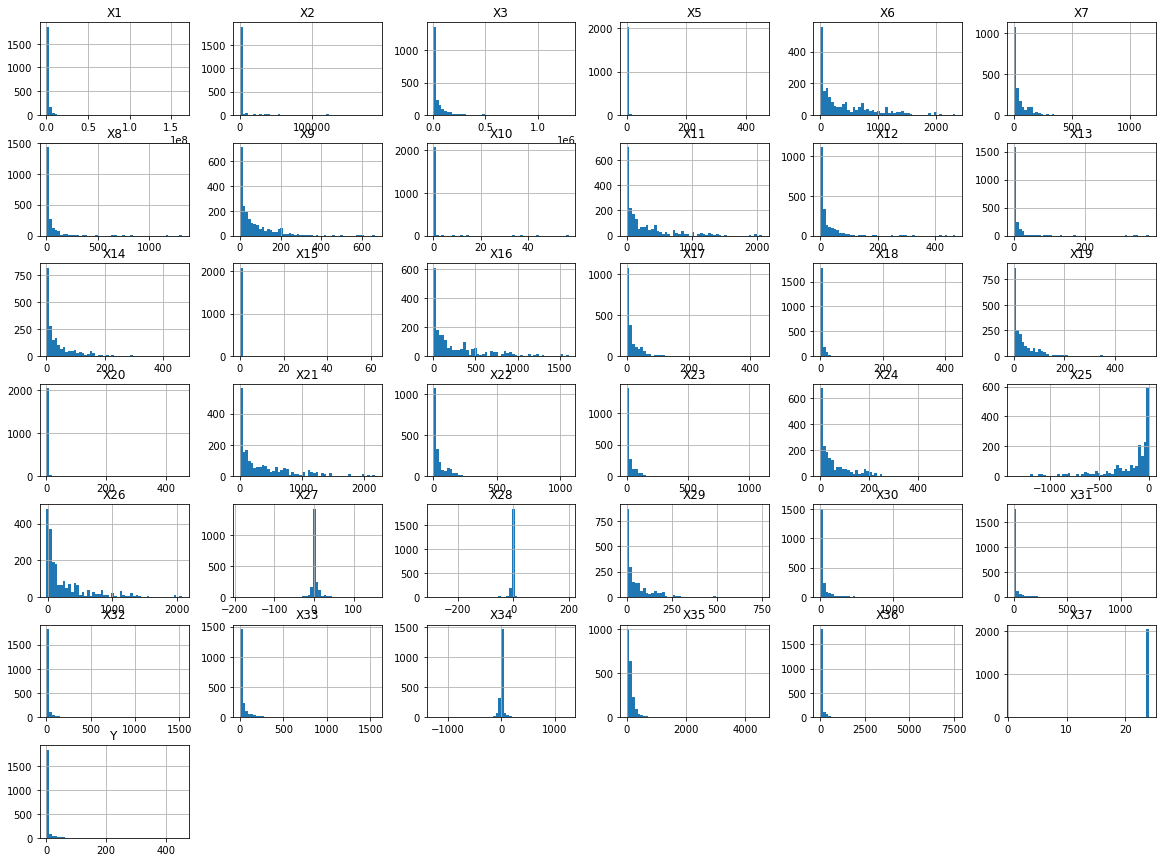

In [14]:
%matplotlib inline

data.hist(bins = 50, figsize = (20,15)) 
plt.show()

<AxesSubplot:xlabel='Y'>

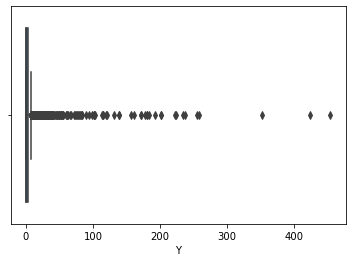

In [15]:
# Le box plot de la variable cible
sns.boxplot(x = data['Y'])

Nous remarquons une possible existence de valeurs aberrantes. Nous allons utiliser la statistique z-score pour confirmer
ou nier ce soupçon.

In [16]:
# Z score
from scipy import stats

z_scores = np.abs(stats.zscore(final_data['Y']))
print(z_scores)

threshold = 3

# Position of the outliers
outliers = np.where(z_scores > threshold)
print(outliers)

[0.24484707 0.90018086 1.78665409 ... 0.24484707 0.19838954 0.08758039]
(array([   3,    5,    7,   16,   41,   65,   90,  155,  239,  254,  255,
        395,  397,  407,  442,  545,  571,  591,  620,  663,  804,  867,
       1041, 1102, 1134, 1226, 1533, 1674, 1686, 1742, 1746, 1803, 2023,
       2043, 2067], dtype=int64),)


In [17]:
print("Avant : ", final_data.shape)
''' Suppression des outliers '''
final_data.drop(outliers[0], inplace = True)
 
print("Après : ", final_data.shape)

Avant :  (2091, 127)
Après :  (2056, 127)


In [18]:
# Répartion des données
seed = 12345

kf = StratifiedKFold(n_splits = 10, shuffle = True, random_state = seed)

Y = final_data["Y"].copy()
X = final_data.drop(["Y", 'X4', 'X38'], axis = 1).copy()
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state = seed)
X_train.shape
X_test.shape
print(X_train.shape, X_test.shape)

(1542, 124) (514, 124)


In [19]:
listes = X_train.iloc[:, 0:36].columns.to_list()

In [22]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

# scaler_sd = StandardScaler()
scaler_sd = ColumnTransformer([
        ('scaler', StandardScaler(), listes)
    ], remainder = 'passthrough')


# Get scaling parameters with the train sample exclusively, using the Scaler.fit() function
scaler_sd.fit(X_train)

# Scale data using Scaler.transform()
X_train_scaled = pd.DataFrame(scaler_sd.transform(X_train))
X_test_scaled = pd.DataFrame(scaler_sd.transform(X_test))

# Régression linéaire

## Régression linéaire ordinaire

In [20]:
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNet, ElasticNetCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

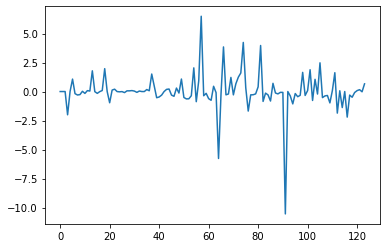

In [21]:
# Régression linéaire simple

lin_reg = LinearRegression().fit(X_train, Y_train)
Y_pred_lin_reg = lin_reg.predict(X_test) 
lin_mae = mean_absolute_error(Y_test, Y_pred_lin_reg)
plt.plot(lin_reg.coef_)

In [22]:
print(f"MAE = {lin_mae}")

MAE = 3.579217970675169


__Conclusion__ : On remarque que certaines variables ont des coefficients presque nuls, ce qui pourrait signifier leur non significativité. Nous allons faire une réduction de dimensions pour ne retenir que les variables informatives.

## Régression linéaire sur les composantes principales

In [23]:
from sklearn.decomposition import PCA

pca = PCA()
principalComponents = pca.fit_transform(X_train_scaled)
principalDf = pd.DataFrame(data = principalComponents)

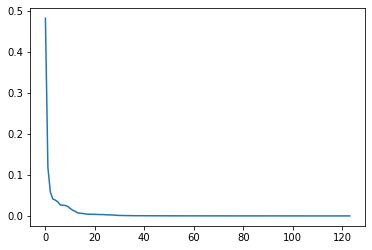

In [24]:
plt.plot(pca.explained_variance_ratio_)

In [25]:
# Vu le graphe ci-dessous, nous pouvons nous limiter à 18 composantes

pca = PCA(n_components = 18)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

In [26]:
pls_reg = LinearRegression().fit(X_train_pca, Y_train)
Y_pred_pls_reg = pls_reg.predict(X_test_pca)  
pls_mae = mean_absolute_error(Y_test, Y_pred_pls_reg)

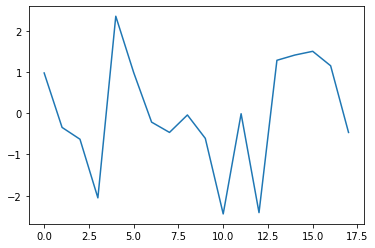

In [27]:
plt.plot(pls_reg.coef_)

In [28]:
print(f"MAE = {pls_mae}")

MAE = 3.239747210500504


__Conclusion__ : Nous pouvons remarquer que la MAE est plus faible que celle de la régression linéaire, ce qui confirme l'existence des variables non informatives ou corrélées entre elles. Nous allons faire maintenant une régression lasso, ridge et elastic net pour mieux sélectionner les variables.

## Lasso

In [23]:
lasso = LassoCV(alphas =  [.001,.01,.1,.2, .5, 1, 2, 5, 10, 20 , 50,100, 200, 500], cv = kf, random_state = seed)
lasso.fit(X_train_scaled, Y_train)
Y_pred_lasso = lasso.predict(X_test_scaled)  
lasso_mae = mean_absolute_error(Y_test, Y_pred_lasso)
print(lasso.alpha_)

0.5


In [ ]:
 print(f"MAE = {lasso_mae}")

## LSLASSO

In [24]:
print(lasso.coef_[lasso.coef_ != 0])

[0.06888655 0.65358717 0.26847798 0.13217742 0.21361406 5.26518701]


In [32]:
print("Variables sélections avec Lasso %s " % np.sum(lasso.coef_ > 0 ))

Variables sélections avec Lasso 6 


In [25]:
indices_lasso = np.where(lasso.coef_ > 0)

In [26]:
data_clean = X_train.iloc[:, indices_lasso[0]]

In [27]:
vars_select_lasso = data_clean.columns.tolist()

In [36]:
X_train_SelLasso = X_train.iloc[:, indices_lasso[0]]
X_test_SelLasso = X_test.iloc[:, indices_lasso[0]]

regr2Lasso = LinearRegression()
regr2Lasso.fit(X_train_SelLasso, Y_train)

Y_pred_regr2lasso = regr2Lasso.predict(X_test_SelLasso)  
lslasso_mae = mean_absolute_error(Y_test, Y_pred_regr2lasso)

In [37]:
 print(f"MAE = {lslasso_mae}")

MAE = 3.1478588537458436


__Conclusion__ : On note une nette amélioration. Sur les six variables sélectionnées par la régression, la régression fait mieux que les modèles (lasso et regression linéaire). Cependant, la sélection est un peu sévère.

## Ridge

In [38]:
ridge = RidgeCV(alphas =  [.001,.01,.1,.2, .5, 1, 2, 5, 10, 20 , 50,100, 200, 500], cv = kf)
ridge.fit(X_train_scaled, Y_train)
print(ridge.alpha_)

Y_pred_ridge = ridge.predict(X_test_scaled)  
ridge_mae = mean_absolute_error(Y_test, Y_pred_ridge)

200.0


In [39]:
 print(f"MAE = {ridge_mae}")

MAE = 3.3315324948159466


## ElasticNet

In [28]:
elastic_net = ElasticNetCV(alphas =  [.001,.01,.1,.2, .5, 1, 2, 5, 10, 20 , 50,100, 200, 500],
                           cv = kf, random_state = seed)
elastic_net.fit(X_train_scaled, Y_train)
print(elastic_net.alpha_)

Y_pred_elastic_net = elastic_net.predict(X_test_scaled)  
elastic_net_mae = mean_absolute_error(Y_test, Y_pred_elastic_net)

0.2


In [41]:
 print(f"MAE = {elastic_net_mae}")

MAE = 3.3001977683682178


In [42]:
print("Selected variables with ElasticNet %s " % np.sum(elastic_net.coef_ != 0 ))

Selected variables with ElasticNet 22 


In [29]:
print(elastic_net.coef_[elastic_net.coef_ != 0])

[ 0.28203687  0.30684102 -0.25016517  0.3730803   0.18234843  0.32430276
  0.58042436  0.43006594  0.3039035  -0.33523571  0.12347668  0.34678972
  0.02141511 -0.10528482  0.06656712  4.39150217  0.63908815  0.91657806
 -0.05452322 -0.18680793  0.28413253  0.14165296]


In [30]:
indices_elasticnet = np.where(elastic_net.coef_ != 0)
X_train_SelElas = X_train.iloc[:, indices_elasticnet[0]]
X_test_SelElas = X_test.iloc[:, indices_elasticnet[0]]

In [31]:
vars_select_elas = X_train_SelElas.columns.tolist()

In [46]:
reg_eLastnet = LinearRegression()
reg_eLastnet.fit(X_train_SelElas, Y_train)

Y_pred_reg_elasnet = reg_eLastnet.predict(X_test_SelElas)  
elasnets_mae = mean_absolute_error(Y_test, Y_pred_reg_elasnet)

In [47]:
 print(f"MAE = {elasnets_mae}")

MAE = 3.329429284508753


In [48]:
print("MAE des modèles.\n")

for method, error in zip(["ols           ", "pca_before_ols", "lasso         ", "lslasso       ", "ridge         ",
                         "elasticnet    ", "elastincet (2)"],
                         [lin_mae, pls_mae, lasso_mae, lslasso_mae, ridge_mae, elastic_net_mae, elasnets_mae]):
    print(method + " : %.2f" % error)

MAE des modèles.

ols            : 3.58
pca_before_ols : 3.24
lasso          : 3.24
lslasso        : 3.15
ridge          : 3.33
elasticnet     : 3.30
elastincet (2) : 3.33


In [49]:
print("Les variables sélectionnées avec Lasso")
print(vars_select_lasso)

print("Les variables sélectionnées avec ElasticNet")
print(vars_select_elas)

Les variables sélectionnées avec Lasso
['X3', 'X7', 'X9', 'X13', 'X17', 'X31']
Les variables sélectionnées avec ElasticNet
['X2', 'X3', 'X5', 'X7', 'X8', 'X9', 'X13', 'X15', 'X17', 'X20', 'X22', 'X23', 'X24', 'X27', 'X28', 'X31', 'X32', 'X34', 'X35', 'X36', 'X37', 13]


Nous constatons que le modèle ElasticNet retient plus variables que le modèle Lasso qui est sévère dans la sélection des varianles. Notons également toutes les variables sélectionnés avec Lasso sont aussi sélectionnés dans ElasticNet. Cependant ELasticNet a l'avantage de mieux contrôler le risque d'overfitting. Donc, nous allons retenir les variables retenues avec ELasticNet.

In [34]:
X_train_1 = X_train.iloc[:, indices_lasso[0]]
X_test_1 = X_test.iloc[:, indices_lasso[0]]
X_train_2 = X_train.iloc[:, indices_elasticnet[0]]
X_test_2 = X_test.iloc[:, indices_elasticnet[0]]

X_train_scaled_1 = X_train_scaled.iloc[:, indices_lasso[0]]
X_test_scaled_1 = X_test_scaled.iloc[:, indices_lasso[0]]
X_train_scaled_2 = X_train_scaled.iloc[:, indices_elasticnet[0]]
X_test_scaled_2 = X_test_scaled.iloc[:, indices_elasticnet[0]]

# Arbre de regression

In [82]:
from sklearn.tree import DecisionTreeRegressor 
from sklearn import tree

In [83]:
tree_reg = DecisionTreeRegressor(min_samples_leaf = 100) 
tree_reg.fit(X_train_2, Y_train)

Y_pred_tree = tree_reg.predict(X_test_2) 
tree_mae = mean_absolute_error(Y_test, Y_pred_tree)

In [84]:
print(f"MAE = {tree_mae}")

MAE = 2.8270130239656273


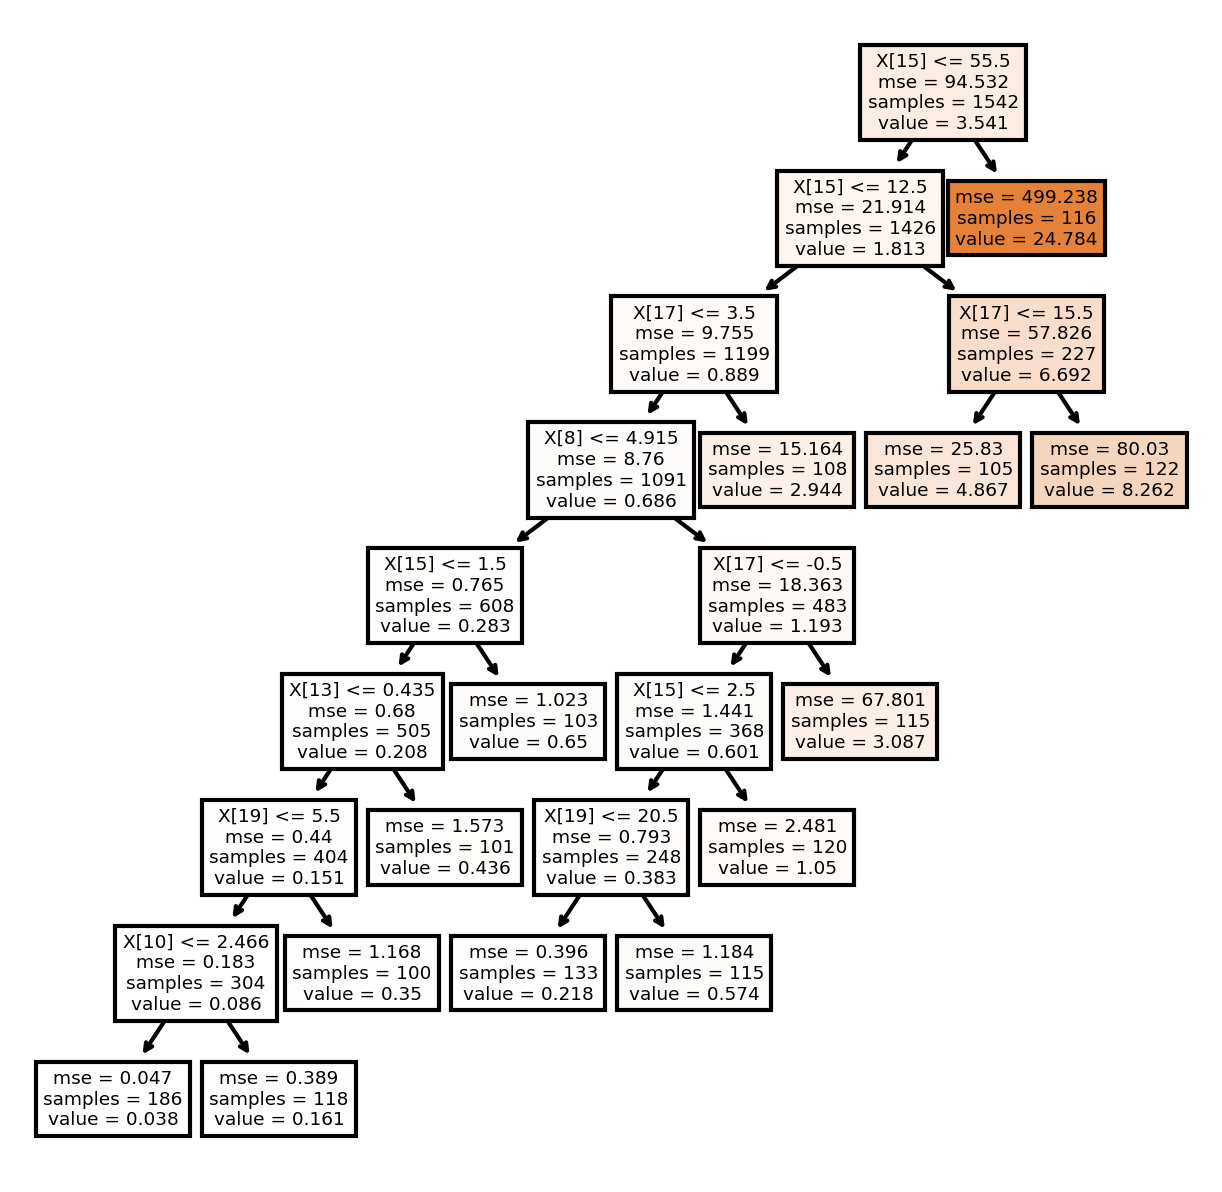

In [85]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (5,5), dpi=300)
tree.plot_tree(tree_reg, filled=True)
#tree.plot_tree(DTC)
plt.show()

# KNN

In [50]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV 

In [87]:
param_grid = {
    'n_neighbors' : [2, 4, 5, 6, 8, 10, 15, 20, 50, 100],
    'weights' : ["uniform", "distance"],
    'metric' : ['manhattan', 'minkowski']
}

optimal_params = GridSearchCV(
        KNeighborsRegressor(),
        param_grid,
        cv = kf,
        scoring = 'neg_mean_absolute_error',
        n_jobs = -1,
        verbose = 0 # NOTE: If you want to see what Grid Search is doing, set verbose=2
    )

optimal_params.fit(X_train_scaled_2, Y_train)
print(optimal_params.best_params_)

{'metric': 'minkowski', 'n_neighbors': 50, 'weights': 'distance'}


In [88]:
neigh = KNeighborsRegressor(n_neighbors = 50, weights = 'distance', metric = "minkowski")

neigh.fit(X_train_scaled_2, Y_train)

Y_pred_neigh = neigh.predict(X_test_scaled_2)
neigh_mae = mean_absolute_error(Y_test, Y_pred_neigh)
print("MAE: %f" % (neigh_mae))

MAE: 3.250362


# Support vector machine - SVM

In [51]:
from sklearn.svm import LinearSVR
from sklearn.pipeline import Pipeline, make_pipeline

In [109]:
# scaled_svm = Pipeline([
#     ("scaler", StandardScaler()),
#     ("svm", LinearSVR(random_state = seed))
# ])

In [52]:
param_grid = [
  {'C': [0.01, 0.1, 1, 10, 100, 1000, 2000], 
   'epsilon': [0, 0.1, 0.5, 1, 1.5, 2, 5, 10]},
 ]

optimal_params = GridSearchCV(
        LinearSVR(random_state = seed),
        param_grid,
        cv = kf,
        scoring = 'neg_mean_absolute_error',
        n_jobs = -1,
        verbose = 0 # NOTE: If you want to see what Grid Search is doing, set verbose=2
    )

optimal_params.fit(X_train_scaled_1, Y_train)
print(optimal_params.best_params_)

{'C': 1, 'epsilon': 0}


In [54]:
svm_reg = LinearSVR(C = 1, epsilon = 0) 
svm_reg.fit(X_train_scaled_1, Y_train)

Y_pred_SVR = svm_reg.predict(X_test_scaled_1) 
svm_reg_mae = mean_absolute_error(Y_test, Y_pred_SVR)

In [55]:
print(f"MAE = {svm_reg_mae}")

MAE = 2.4711145674990367


In [96]:
print("MAE des modèles.\n")

for method, error in zip(["Arbre    ", "KNN      ", "LinearSVR"],
                         [tree_mae, neigh_mae, svm_reg_mae]):
    print(method + " : %.2f" % error)

MAE des modèles.

Arbre     : 2.83
KNN       : 3.25
LinearSVR : 2.47


# Bagging

## Forêt aléatoire

In [100]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
tree = DecisionTreeRegressor(min_samples_leaf = 50, criterion = "absolute_error")
RF = RandomForestRegressor(tree, 
                        random_state = seed)
parameters = {'n_estimators' : [50, 100, 200],
              'criterion' : ["absolute_error", "mae"],
              'max_features' : [3, 4, 5, 6, 7, 8, 9, 10]}
    
optRF = GridSearchCV(RF, parameters, cv = kf, n_jobs = -1, scoring = 'neg_mean_absolute_error')

optRF.fit(X_train_2, Y_train)
Y_pred_RF = optRF.predict(X_test_2)
RF_mae = mean_absolute_error(Y_test, Y_pred_RF)

In [ ]:
 print(f"MAE = {RF_mae}")

In [99]:
from sklearn.ensemble import BaggingRegressor

In [ ]:
tree = DecisionTreeRegressor(criterion = "absolute_error")
bag = BaggingRegressor(tree, random_state = seed)
parameters = {'n_estimators' : [10, 50, 100, 200],
              'max_samples' : [0.2, 0.5, 0.8]}
    
optBagg = GridSearchCV(bag, parameters, cv = kf, n_jobs = -1, scoring = 'neg_mean_absolute_error')

optBagg.fit(X_train, Y_train)
Y_pred_Bagg = optBagg.predict(X_test)
Bagg_mae = mean_absolute_error(Y_test, Y_pred_Bagg)

In [ ]:
print(f"MAE = {Bagg_mae}")

## Bagging avec LinearSVR

In [ ]:
SVR = LinearSVR()
bag = BaggingRegressor(SVR, random_state = seed)
parameters = {'n_estimators' : [10, 50, 100, 200],
              'max_samples' : [0.2, 0.5, 0.8]}
    
optBaggSVR = GridSearchCV(bag, parameters, cv = kf, n_jobs = -1, scoring = 'neg_mean_absolute_error')

optBaggSVR.fit(X_train, Y_train)
Y_pred_BaggSVR = optBaggSVR.predict(X_test)
BaggSVR_mae = mean_absolute_error(Y_test, Y_pred_BaggSVR)

In [ ]:
print(f"MAE = {BaggSVR_mae}")

In [ ]:
print("MAE des modèles.\n")

for method, error in zip(["RF           ", "RF (2)           ", "BaggSVR         "],
                         [RF_mae, Bagg_mae, BaggSVR_mae]):
    print(method + " : %.2f" % error)

# Boosting

## AdaBoost

In [ ]:
from sklearn.ensemble import AdaBoostRegressor

In [ ]:
params = {'n_estimators' : [10, 50, 100, 200],
         'loss' : ['linear', 'square', 'exponential']}

AdaBoost = AdaBoostRegressor()
optAdaBoost = GridSearchCV(AdaBoost, params, cv = kf, n_jobs = -1, scoring = "neg_mean_absolute_error")
optAdaBoost.fit(X_train_2, Y_train)

Y_pred_AdaBoost = optAdaBoost.predict(X_test_2)
optAdaBoost_mae = mean_absolute_error(Y_test, Y_pred_AdaBoost)

In [ ]:
print(f"MAE = {optAdaBoost_mae}")

## XGBoost

In [ ]:
import xgboost as xgb
from xgboost import XGBRegressor

In [ ]:
param_grid = {'max_depth':[2, 3, 5, 10], 'gamma':[0, 0.5, 1], 'n_estimators':[10, 50, 100, 200], 'learning_rate':[0.01, 0.05, 0.1, 0.3]}

optimal_params = GridSearchCV(
        XGBRegressor(objective = 'reg:linear', seed = seed), 
        param_grid,
        cv = 10, n_jobs = -1, scoring = 'neg_mean_absolute_error',
        verbose = 0
    )

optimal_params.fit(X_train_Sel, Y_train)
print(optimal_params.best_params_)

In [ ]:
xg_reg = xgb.XGBRegressor(objective ='reg:linear', gamma = 1, learning_rate = 0.1,
                max_depth = 2, n_estimators = 50)

xg_reg.fit(X_train, Y_train)

Y_pred_xgb = xg_reg.predict(X_test)
xgb_mae = mean_absolute_error(Y_test, Y_pred_xgb)
print("MAE: %f" % (xgb_mae))

In [ ]:
print("MAE des modèles.\n")

for method, error in zip(["AdaBoost", "XGBoost "],
                         [optAdaBoost_mae, xgb_mae]):
    print(method + " : %.2f" % error)

## Stacking

In [ ]:
from sklearn.ensemble import StackingRegressor

In [ ]:
estimators = [
    ('lr', xg_reg),
    ('rf', optBaggSVR),
    ('svm', make_pipeline(StandardScaler(), svm_reg))]

reg_stack = StackingRegressor(estimators = estimators, final_estimator = LinearRegression(),
                              cv = 10, n_jobs = -1, verbose = 0)
      
reg_stack.fit(X_train_2, Y_train)

In [ ]:
Y_pred_stack = reg_stack.predict(X_test_2)
stack_mae = mean_absolute_error(Y_test, Y_pred_stack)
print("MAE: %f" % (stack_mae))

__Conclusion finale__ : Nous allons utiliser le modèle LinearSVR pour la prédiction des données évaluations. En effet, ce dernier est plus simple que les modèles ensemblistes et donne une mae meilleure que les modèles.

# Importation et pré-traitement des données d'évaluation

In [56]:
data_eval = pd.read_csv('TestForStudents.csv', delimiter = ",",decimal = ".", encoding = result['encoding'])

In [57]:
data_eval

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38
0,634995,0,463,Source1,0,806,11.291045,1.0,70.495138,0,...,69.850580,0,0,0,0,0,166,2,24,Wednesday
1,634995,0,463,Source1,0,806,11.291045,1.0,70.495138,0,...,69.850580,0,0,0,0,0,132,1,24,Thursday
2,634995,0,463,Source1,0,806,11.291045,1.0,70.495138,0,...,69.850580,0,0,0,0,0,133,2,24,Friday
3,634995,0,463,Source1,0,806,11.291045,1.0,70.495138,0,...,69.850580,7,0,3,7,-3,131,1,24,Friday
4,634995,0,463,Source1,0,806,11.291045,1.0,70.495138,0,...,69.850580,1,0,0,1,0,142,5,24,Monday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38853,7170111,70,497000,Source9,0,1881,497.200000,269.0,502.318385,0,...,490.821538,269,14,58,240,-44,12,1511,2,Wednesday
38854,7170111,70,497000,Source9,0,1881,497.200000,269.0,502.318385,0,...,490.821538,644,20,106,619,-86,149,1099,3,Wednesday
38855,7170111,70,497000,Source9,0,1881,497.200000,269.0,502.318385,0,...,490.821538,620,620,0,620,620,120,2962,24,Wednesday
38856,7170111,70,497000,Source9,0,1881,497.200000,269.0,502.318385,0,...,490.821538,629,189,440,588,-251,33,1383,9,Wednesday


In [58]:
from sklearn.preprocessing import OneHotEncoder

# creating instance of one-hot-encoder
encoder = OneHotEncoder(handle_unknown = 'ignore')

# #perform one-hot encoding on 'team' column 
encoders = pd.DataFrame(encoder.fit_transform(data_eval[['X4', 'X38']]).toarray())

# merge one-hot encoded columns back with original DataFrame
data_eval_ = data_eval.join(encoders)
data_eval_.drop(['X4', 'X38'], axis = 1, inplace = True)

# view final df
print(data_eval_)

            X1  X2      X3  X5    X6          X7     X8          X9  X10  \
0       634995   0     463   0   806   11.291045    1.0   70.495138    0   
1       634995   0     463   0   806   11.291045    1.0   70.495138    0   
2       634995   0     463   0   806   11.291045    1.0   70.495138    0   
3       634995   0     463   0   806   11.291045    1.0   70.495138    0   
4       634995   0     463   0   806   11.291045    1.0   70.495138    0   
...        ...  ..     ...  ..   ...         ...    ...         ...  ...   
38853  7170111  70  497000   0  1881  497.200000  269.0  502.318385    0   
38854  7170111  70  497000   0  1881  497.200000  269.0  502.318385    0   
38855  7170111  70  497000   0  1881  497.200000  269.0  502.318385    0   
38856  7170111  70  497000   0  1881  497.200000  269.0  502.318385    0   
38857  7170111  70  497000   0  1881  497.200000  269.0  502.318385    0   

        X11  ...   76   77   78   79   80   81   82   83   84   85  
0       806  ...  

In [59]:
listes = data_eval_.iloc[:, 0:36].columns.to_list()

In [60]:
noms = data_eval_.columns.tolist()

In [61]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

scaler_sd = ColumnTransformer([
        ('scaler', StandardScaler(), listes)
    ], remainder = 'passthrough')

scaler_sd.fit(data_eval_)

data_eval_scaled = pd.DataFrame(scaler_sd.transform(data_eval_))

In [62]:
data_eval_scaled.columns = noms

In [63]:
# data.eval = data_eval_([vars_select_lasso]).copy()
data.eval_scaled = data_eval_scaled[vars_select_lasso].copy()

In [64]:
predictions = svm_reg.predict(data.eval_scaled)

In [65]:
pd.DataFrame(predictions).to_csv(r'id1912.csv', header=False, index=False)